In [2]:
%reset -f
import numpy as np
import ROOT
from ROOT import RDataFrame, TCanvas

xyzs = np.load('data/train_XYZ.npy')
preds = np.load('data/train_pred.npy')
in_npy = np.c_[xyzs[:,:,0],xyzs[:,:,1],preds]

col_names = ['ex0','ey0','ez0','px0','py0','pz0','emult','pmult']
dd = {k:in_npy[:,i].astype(float) for i,k in enumerate(col_names)}#dict(zip(col_names, in_npy.T))
rdf = ROOT.RDF.MakeNumpyDataFrame(dd)

vals = 'ex,ey,ez,px,py,pz,mm2,mm20,mm,mm0'
rdf = rdf.Define('vals', '''
TLorentzVector beam, targ, e0, p0, e, p;
beam.SetXYZT(0,0,10.6041,10.6041);
targ.SetXYZT(0,0,0,0.938272081);
e0.SetXYZM(ex0,ey0,ez0,0.000510999);
p0.SetXYZM(px0,py0,pz0,0.938272081);

auto ex = emult*ex0, ey = emult*ey0, ez = emult*ez0;
auto px = pmult*px0, py = pmult*py0, pz = pmult*pz0;
e.SetXYZM(ex,ey,ez,0.000510999);
p.SetXYZM(px,py,pz,0.938272081);

auto mm20 = (beam+targ-e0-p0).M2(), mm2 = (beam+targ-e-p).M2();
auto mm0 = sqrt(mm20), mm = sqrt(mm2);
return vector<double>{'''+vals+'};')
for i,v in enumerate(vals.split(',')):
  rdf = rdf.Define(v, f'vals[{i}]')

# for d in (dd, rdf.AsNumpy()):
#   for k, v in d.items():
#     print(k, v.shape, v.min(), v.max(), v.mean(), v.std())
#   print()

Welcome to JupyROOT 6.26/02


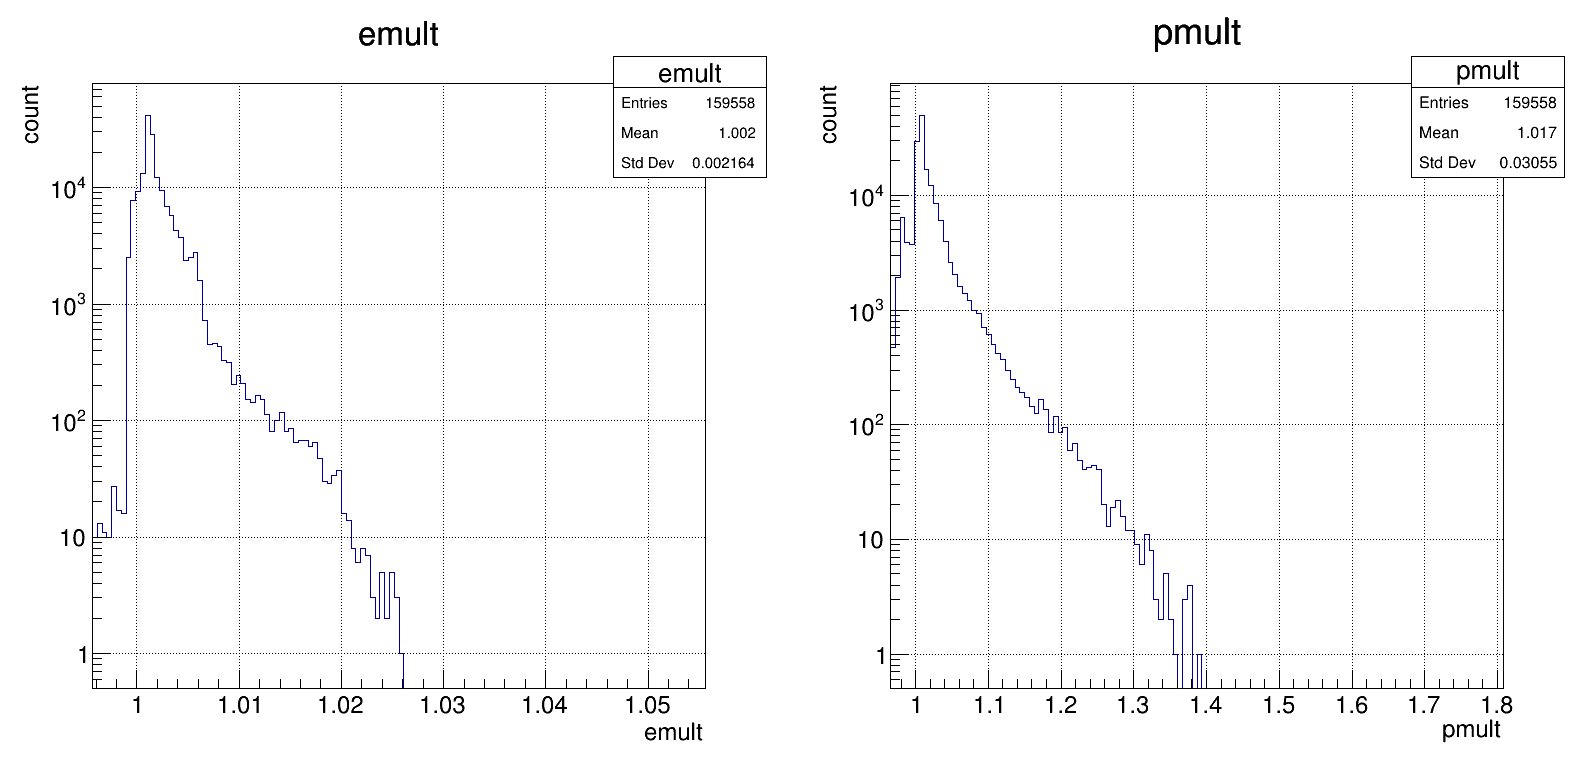

In [3]:
c1 = TCanvas('c1','c1',1600,800); c1.Divide(2,1); c1.Draw()
c1.cd(1).SetGrid()
c1.cd(1).SetLogy()
h1 = rdf.Histo1D('emult')
h1.Draw()

c1.cd(2).SetGrid()
c1.cd(2).SetLogy()
h2 = rdf.Histo1D('pmult')
h2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


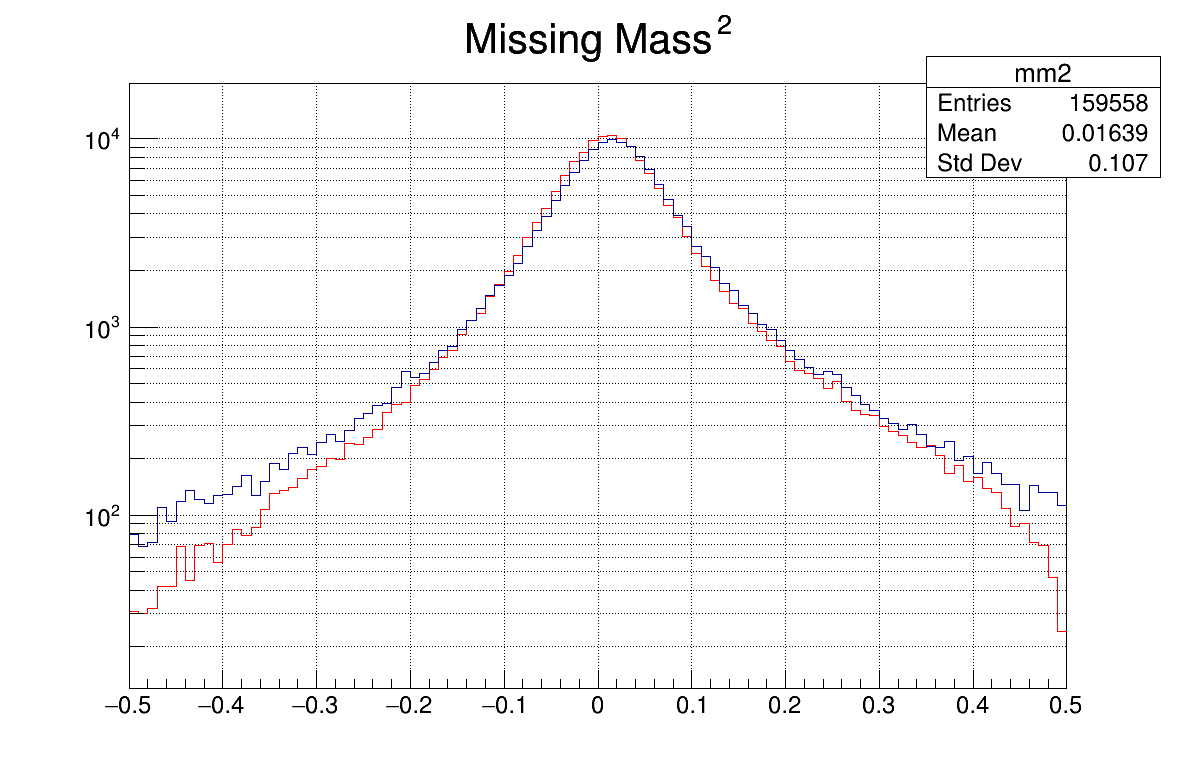

In [6]:
c1 = TCanvas('c1','c1',1200,800); c1.Divide(1,1); c1.Draw()
bins=(100,-0.5,0.5)
c1.cd(1).SetGrid()
c1.cd(1).SetLogy()

h2 = rdf.Histo1D(('mm2','Missing Mass^{2}',*bins),'mm2')
h2.SetLineColor(ROOT.kRed)
h2.Draw('same')

h1 = rdf.Histo1D(('mm20','Missing Mass^{2}',*bins),'mm20')
h1.Draw('same')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


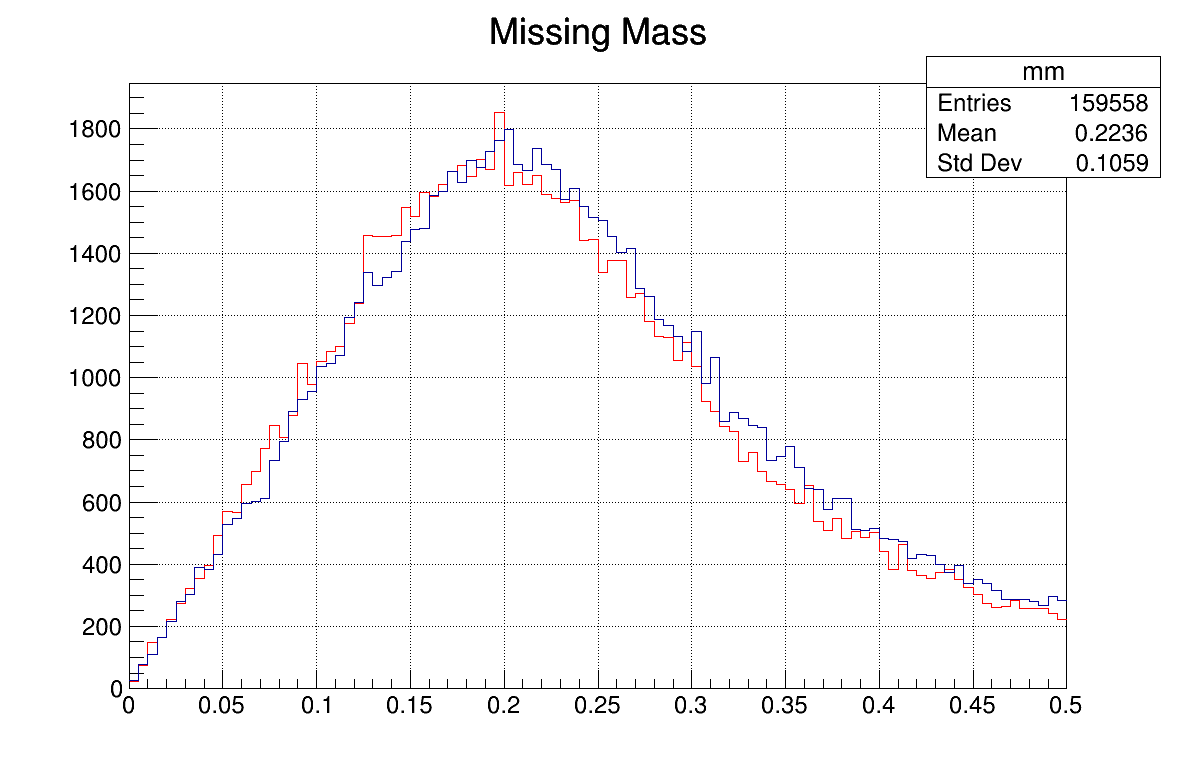

In [7]:
c1 = TCanvas('c1','c1',1200,800); c1.Divide(1,1); c1.Draw()
bins=(100,0,0.5)
c1.cd(1).SetGrid()
# c1.cd(1).SetLogy()

h2 = rdf.Histo1D(('mm','Missing Mass',*bins),'mm')
h2.SetLineColor(ROOT.kRed)
h2.Draw('same')

h1 = rdf.Histo1D(('mm0','Missing Mass',*bins),'mm0')
h1.Draw('same')
